In [169]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = 'D:\\Github\\2nd-ML100Days\\'

In [170]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
print(f_app_train)
app_train = pd.read_csv(f_app_train)

D:\Github\2nd-ML100Days\application_train.csv


In [171]:
#顯示前五筆
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
result = app_train['AMT_INCOME_TOTAL'].describe() #excel欄位中的'AMT_INCOME_TOTAL'
#print(result.max()) #25650.0 
result_pd =pd.DataFrame(result )
result_pd

,AMT_INCOME_TOTAL
count,3.075110e+05
mean,1.687979e+05
std,2.371231e+05
min,2.565000e+04
25%,1.125000e+05
50%,1.471500e+05
75%,2.025000e+05
max,1.170000e+08


In [173]:
#取值及轉型
min=result.min()
min =int(min)
mean=result.mean()
mean =int(mean)
std=result.std()
std =int(std)
max=result.max()
max =int(max)

In [174]:
result = app_train.describe(include=['object'])
result
#count：指定字段的非空總數
#unique：該字段中保存的值類型數量，比如有自己的車子只有'Y'和'N'兩種值，則unique值則為2
#top：數量最多的值，這裡是沒有最多['N']
#freq：數量最多的值的總數

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [175]:
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib inline 代表讓你可以在 jupyter 的環境下可以顯示圖片

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


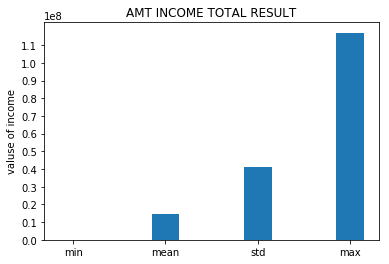

In [176]:
valuse = [min,mean,std,max] #分別為最小值、平均值、標準差、最大值
N = len(valuse) #計算長度
x = np.arange(N) # X座標
width = 0.3 #寬度
plt.bar(x,valuse,width) #繪製長條圖

plt.ylabel('valuse of income') 
plt.title('AMT INCOME TOTAL RESULT')
plt.xticks(x,('min','mean','std','max')) #各個長條圖名稱
plt.yticks(np.arange(0,120000000,10000000)) #給予範圍(開始,終止,間隔)
plt.show()

由上圖可知有非常嚴重的平富差距，沒錢的幾乎沒有收入，而有錢的人遠大於這些人，甚至超過標準差兩倍。